We will start by implementing the experiments conducted by Albert, Jeong, and Barabasi.

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import seaborn as sns
import random

### Creating an ER Random Graph and a WS Small World Graph

In [196]:
n = 10000
m = 20000
k = 4
p_ER = 1
p_WS = 0.1

ER = nx.gnm_random_graph(n, m)
# ER = nx.erdos_renyi_graph(n, p_ER)
WS = nx.watts_strogatz_graph(n, k, p_WS)
print(ER, WS)

Graph with 10000 nodes and 20000 edges Graph with 10000 nodes and 20000 edges


### Reading in the Electrical Grid Graph and Using that

In [197]:
def read_graph(filename):
    G = nx.Graph()
    array = np.loadtxt(filename, dtype=int)
    G.add_edges_from(array)
    return G

In [198]:
electrical_grid = read_graph('opsahl-powergrid/out.opsahl-powergrid')
print(electrical_grid)

Graph with 4941 nodes and 6594 edges


In [199]:
def flip(p):
    """Returns True with probability `p`."""
    return np.random.random() < p

# def random_attack(G, p):
#     """Returns a graph with nodes removed at probability p"""
#     H = G.copy()
#     for i in list(H.nodes()):
#         if flip(p):
#             H.remove_node(i)
#     return H

def random_attack(G, k):
    """Returns a graph with percent f nodes removed at random"""
    nodes_removed = random.sample(list(G.nodes),k=k)
    G.remove_nodes_from(nodes_removed)

    
def target_edge_attack(G):
    pass

def sample_path_lengths(G, nodes=None, trials=1000):
    """Choose random pairs of nodes and compute the path length between them.

    G: Graph
    nodes: list of nodes to choose from
    trials: number of pairs to choose

    returns: list of path lengths
    """
    if nodes is None:
        nodes = list(G)
    else:
        nodes = list(nodes)
    
        
    pairs = np.random.choice(nodes, (trials, 2))
    lengths = []
    for pair in pairs:
        try:
            path = nx.shortest_path_length(G, *pair)
            lengths.append(path)
        except:
            pass
    return lengths

def average_shortest_length(G):
    return np.mean(sample_path_lengths(G))

# def get_clusters(G):
    
#     clusters = []
#     queue = list(G.nodes())
#     while queue:
#         i = queue.pop()
#         connected_nodes = nx.node_connected_component(G, i)
#         for x in connected_nodes:
#             if x in queue:
#                 queue.remove(x)
#         clusters.append(len(connected_nodes))
    
#     return clusters

# def clusters(G):
#     cluster_list = get_clusters(G)
#     print(cluster_list)
#     max_val = max(cluster_list)
#     isolated = cluster_list.copy()
#     isolated.remove(max_val)
#     if not isolated:
#         isolated = [1]
#     return max_val / len(G.nodes()), np.mean(isolated)

def clusters(G):
    largest = len(max(nx.connected_components(G), key=len)) / len(G.nodes())
    sizes = [len(i) for i in nx.connected_components(G)]
    average_isolated = np.mean(sizes) / len(G.nodes())
    return largest, average_isolated

Graph with 100 nodes and 300 edges
average shortest length:  3.876
cluster sizes:  [100]
largest relative cluster:  1.0
average cluster size:  1.0
number of nodes:  100


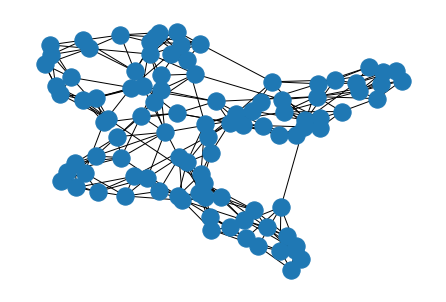

In [200]:
WS = nx.watts_strogatz_graph(100, 7, p_WS)
print(WS)
nx.draw(WS)
largest_cluster, avg_cluster = clusters(WS)

print("average shortest length: ", average_shortest_length(WS))
print("cluster sizes: ", get_clusters(WS))
print("largest relative cluster: ", largest_cluster)
print("average cluster size: ", avg_cluster)
print("number of nodes: ", len(WS.nodes()))

average shortest length:  6.453055141579732
cluster sizes:  [40, 4, 5, 1]
largest relative cluster:  0.8
average cluster size:  0.25
number of nodes:  50


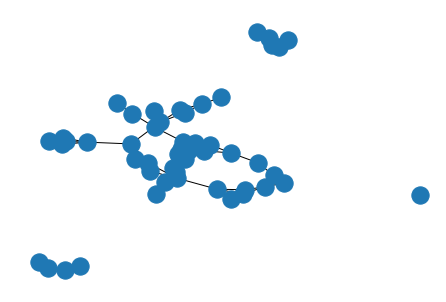

In [201]:
random_attack(WS, 50)
nx.draw(WS)
largest_cluster, avg_cluster = clusters(WS)

print("average shortest length: ", average_shortest_length(WS))
print("cluster sizes: ", get_clusters(WS))
print("largest relative cluster: ", largest_cluster)
print("average cluster size: ", avg_cluster)
print("number of nodes: ", len(WS.nodes()))

Graph with 100 nodes and 282 edges
average shortest length:  2.87
cluster sizes:  [100]
largest relative cluster:  1.0
average cluster size:  1.0
number of nodes:  100


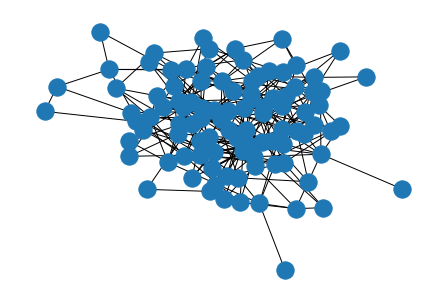

In [217]:
ER = nx.gnm_random_graph(100, 300)
print(ER)
nx.draw(ER)
largest_cluster, avg_cluster = clusters(ER)

print("average shortest length: ", average_shortest_length(ER))
print("cluster sizes: ", get_clusters(ER))
print("largest relative cluster: ", largest_cluster)
print("average cluster size: ", avg_cluster)
print("number of nodes: ", len(ER.nodes()))

average shortest length:  3.912200684150513
cluster sizes:  [47, 1, 1, 1]
largest relative cluster:  0.94
average cluster size:  0.25
number of nodes:  50


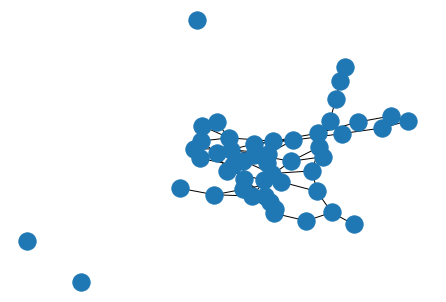

In [218]:
random_attack(ER, 50)
nx.draw(ER)
largest_cluster, avg_cluster = clusters(ER)

print("average shortest length: ", average_shortest_length(ER))
print("cluster sizes: ", get_clusters(ER))
print("largest relative cluster: ", largest_cluster)
print("average cluster size: ", avg_cluster)
print("number of nodes: ", len(ER.nodes()))

In [227]:
n = 1000
m = 3000
k = 7
# p_ER = 0.01
p_WS = 0.05
step=.01
size = int(.8/step)
fr = np.linspace(1,size,size)*step

In [228]:
import time
er_max = []
er_avg = []
ws_max = []
ws_avg = []


ER = nx.gnm_random_graph(n, m)
WS = nx.watts_strogatz_graph(n, k, p_WS)
print(ER, WS)

t0 = time.time()
for i in fr:
    #remove nodes
    random_attack(ER, int(step*n))
    random_attack(WS, int(step*n))
    
    #calculate cluster properties
    erl, era = clusters(ER)
    wsl, wsa = clusters(WS)
    
    
    #add cluster properties
    er_max.append(erl)
    er_avg.append(era)
    ws_max.append(wsl)
    ws_avg.append(wsa)
print("time: ", time.time() - t0)

Graph with 1000 nodes and 3000 edges Graph with 1000 nodes and 3000 edges
time:  0.22072172164916992


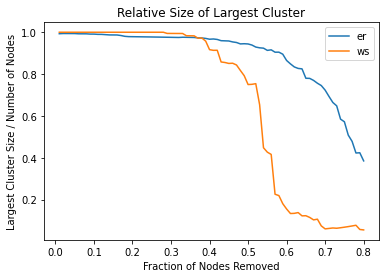

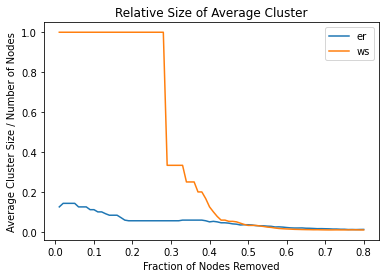

In [229]:
plt.plot(fr, er_max)
plt.plot(fr, ws_max)
plt.legend(['er', 'ws'])
plt.xlabel("Fraction of Nodes Removed")
plt.ylabel("Largest Cluster Size / Number of Nodes")
plt.title("Relative Size of Largest Cluster")
plt.show()

plt.figure()
plt.plot(fr, er_avg)
plt.plot(fr, ws_avg)
plt.legend(['er', 'ws'])
plt.xlabel("Fraction of Nodes Removed")
plt.ylabel("Average Cluster Size / Number of Nodes")
plt.title("Relative Size of Average Cluster")
plt.show()

## Conducting Targeted Attacks

In [209]:
def target_node_attack(G):
    """
    Targets node with the most connections, then removes that node.
    G: Graph to target
    """
    degrees = dict(G.degree())
    target = max(degrees, key=degrees.get)
    G.remove_node(target)

In [231]:
import time
max_frac = 0.8
frac = 0
fr = []
er_max = []
er_avg = []
ws_max = []
ws_avg = []


ER = nx.gnm_random_graph(n, m)
WS = nx.watts_strogatz_graph(n, k, p_WS)
print(ER, WS)

t0 = time.time()
while frac <= max_frac:
    #remove nodes
    target_node_attack(ER)
    target_node_attack(WS)
    
    #calculate cluster properties
    erl, era = clusters(ER)
    wsl, wsa = clusters(WS)
    
    
    #add cluster properties
    frac = (n-len(ER.nodes())) / n
    fr.append(frac)
    er_max.append(erl)
    er_avg.append(era)
    ws_max.append(wsl)
    ws_avg.append(wsa)
print("time: ", time.time() - t0)

Graph with 1000 nodes and 3000 edges Graph with 1000 nodes and 3000 edges
time:  1.89994478225708


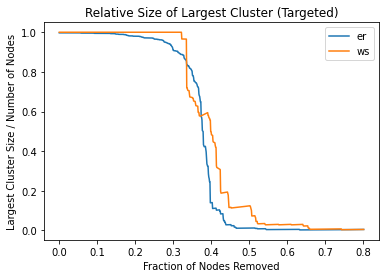

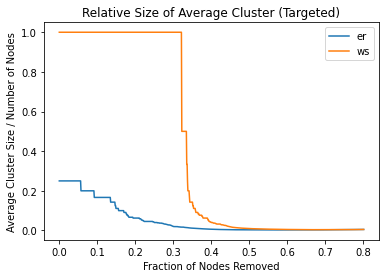

In [234]:
plt.plot(fr, er_max)
plt.plot(fr, ws_max)
plt.legend(['er', 'ws'])
plt.xlabel("Fraction of Nodes Removed")
plt.ylabel("Largest Cluster Size / Number of Nodes")
plt.title("Relative Size of Largest Cluster (Targeted)")
plt.show()

plt.figure()
plt.plot(fr, er_avg)
plt.plot(fr, ws_avg)
plt.legend(['er', 'ws'])
plt.xlabel("Fraction of Nodes Removed")
plt.ylabel("Average Cluster Size / Number of Nodes")
plt.title("Relative Size of Average Cluster (Targeted)")
plt.show()